In [134]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import seaborn as sns
import tensorflow as tf
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

C:\Users\masood135\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
airfoil_df=pd.read_csv('airfoil_self_noise.csv', names=['Frequency','AoA', 'Chord','Velocity','Displacement','SPL'])

In [3]:
airfoil_df.shape

(1503, 6)

In [4]:
airfoil_df.head()

,Frequency,AoA,Chord,Velocity,Displacement,SPL
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [6]:
airfoil_df.describe()

,Frequency,AoA,Chord,Velocity,Displacement,SPL
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


Text(0,0.5,'Sound Pressure Level')

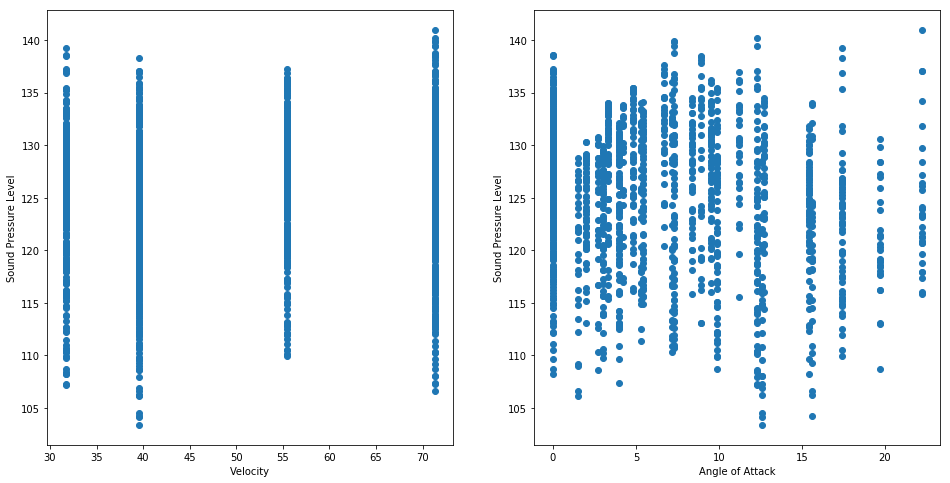

In [114]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.scatter(airfoil_df['Velocity'], airfoil_df['SPL'])
plt.xlabel('Velocity')
plt.ylabel('Sound Pressure Level')
plt.subplot(1,2,2)
plt.scatter(airfoil_df['AoA'], airfoil_df['SPL'])
plt.xlabel('Angle of Attack')
plt.ylabel('Sound Pressure Level')


Text(0,0.5,'Sound Pressure Level')

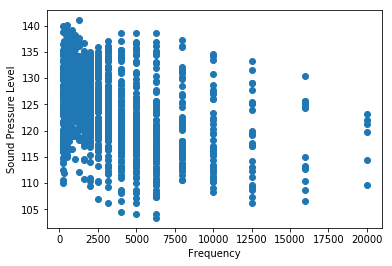

In [121]:
plt.figure()
plt.scatter(airfoil_df['Frequency'], airfoil_df['SPL'])
plt.xlabel('Frequency')
plt.ylabel('Sound Pressure Level')

In [126]:
Fre_10000=airfoil_df[airfoil_df['Frequency']==10000]

Text(0,0.5,'Sound Pressure Level')

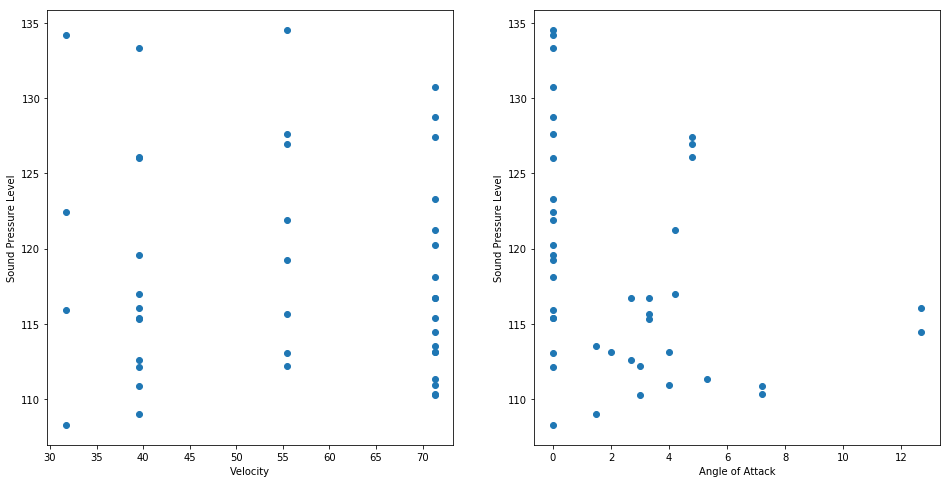

In [127]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.scatter(Fre_10000['Velocity'], Fre_10000['SPL'])
plt.xlabel('Velocity')
plt.ylabel('Sound Pressure Level')
plt.subplot(1,2,2)
plt.scatter(Fre_10000['AoA'], Fre_10000['SPL'])
plt.xlabel('Angle of Attack')
plt.ylabel('Sound Pressure Level')

In [133]:
Vel_71_3=Fre_10000[Fre_10000['Velocity']==71.3]
Vel_71_3

,Frequency,AoA,Chord,Velocity,Displacement,SPL
11,10000,0.0,0.3048,71.3,0.002663,115.391
77,10000,1.5,0.3048,71.3,0.003367,113.492
111,10000,3.0,0.3048,71.3,0.004257,110.224
172,10000,4.0,0.3048,71.3,0.004978,110.905
197,10000,0.0,0.2286,71.3,0.002143,118.134
257,10000,2.0,0.2286,71.3,0.002930,113.086
312,10000,4.0,0.2286,71.3,0.004006,113.108
374,10000,5.3,0.2286,71.3,0.005194,111.350
465,10000,0.0,0.1524,71.3,0.001599,120.247
523,10000,2.7,0.1524,71.3,0.002439,116.724


Text(0,0.5,'Sound Pressure Level')

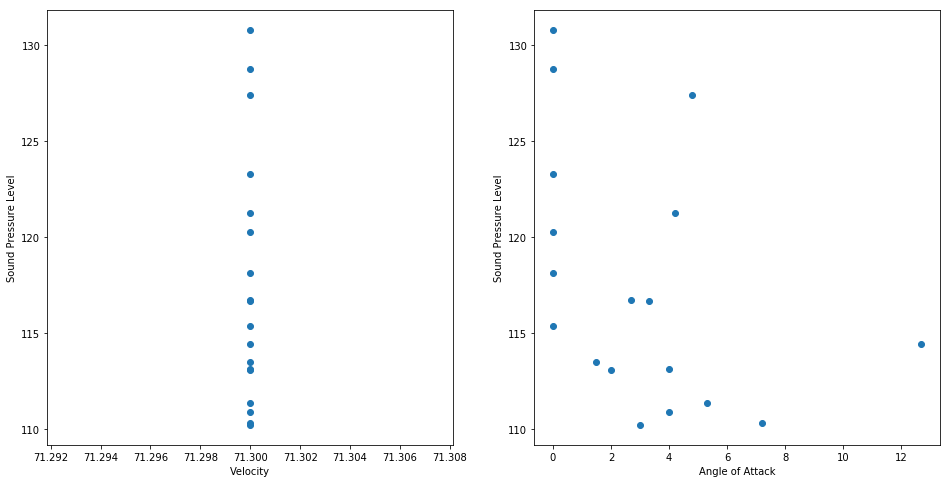

In [132]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.scatter(Vel_71_3['Velocity'], Vel_71_3['SPL'])
plt.xlabel('Velocity')
plt.ylabel('Sound Pressure Level')
plt.subplot(1,2,2)
plt.scatter(Vel_71_3['AoA'], Vel_71_3['SPL'])
plt.xlabel('Angle of Attack')
plt.ylabel('Sound Pressure Level')

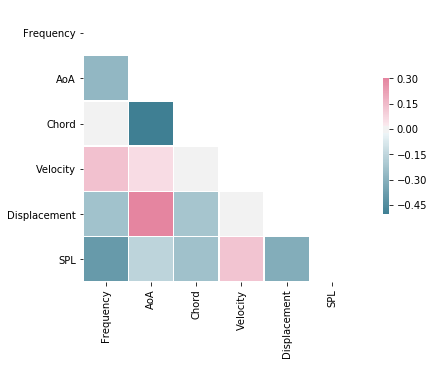

In [117]:
corrmat = airfoil_df.corr()
f, ax = plt.subplots(figsize=(10, 5))
mask = np.zeros_like(corrmat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 1, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrmat, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [7]:
X=airfoil_df[airfoil_df.columns[0:5]]

In [8]:
X.head()

,Frequency,AoA,Chord,Velocity,Displacement
0,800,0.0,0.3048,71.3,0.002663
1,1000,0.0,0.3048,71.3,0.002663
2,1250,0.0,0.3048,71.3,0.002663
3,1600,0.0,0.3048,71.3,0.002663
4,2000,0.0,0.3048,71.3,0.002663


In [186]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,airfoil_df['SPL'], random_state=0)

In [187]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
scaler.fit(X_test)
X_test=scaler.transform(X_test)


In [188]:
X_train

array([[-0.67786196,  2.14993545, -0.89845553,  1.29055377,  1.76991466],
       [-0.61360127, -0.8160111 ,  1.00077161,  1.29055377, -0.6277841 ],
       [-0.77425301,  0.50777295,  0.18681712, -0.72878703,  0.94073715],
       ...,
       [-0.5332754 ,  2.56885446, -1.1697737 ,  1.29055377,  0.79351403],
       [-0.5332754 , -0.24628126,  0.18681712,  0.28406845, -0.51995604],
       [-0.61360127,  0.50777295,  0.18681712, -1.23202969,  1.09032045]])

In [195]:
from sklearn.neural_network import MLPRegressor
mlp=MLPRegressor(solver='lbfgs', hidden_layer_sizes=(100,100,100), activation='relu', random_state=0).fit(X_train,y_train)
mlp.score(X_train,y_train)


0.9304497675031633

In [196]:
mlp.score(X_test,y_test)

0.8808955205598457

In [197]:
mlp_predict=mlp.predict(X_test)
Error=abs(mlp_predict-y_test)
y_test_values=y_test.values

In [198]:
Compare_Data=pd.DataFrame( data=np.c_[mlp_predict,y_test.values, Error] ,
                          columns=['mlp_predict', 'y_test', 'Error' ])
Compare_Data.head()

,mlp_predict,y_test,Error
0,135.312859,130.787,4.525859
1,118.862641,119.541,0.678359
2,112.130457,110.317,1.813457
3,120.574960,117.396,3.178960
4,124.892423,127.625,2.732577


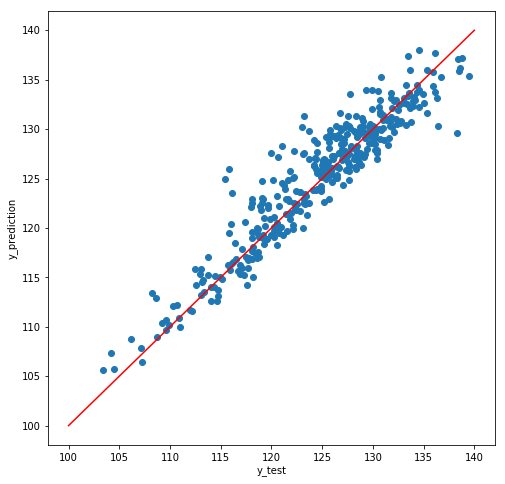

In [228]:
plt.figure(figsize=(8,8))
plt.scatter(y_test,mlp_predict)
plt.xlabel('y_test')
plt.ylabel('y_prediction')
plt.plot(x,x, 'r')
